In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

#for classfication


# for resampling 
from imblearn.over_sampling import RandomOverSampler

# ANN Struktur
import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# for clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

#for regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

In [2]:
df = pd.read_csv('Energy data 1990 - 2020.csv')
df.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


In [3]:
#cek info data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 21 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country                                                                   1364 non-null   object 
 1   Year                                                                      1364 non-null   int64  
 2   Region                                                                    1364 non-null   object 
 3   CO2 emissions from fuel combustion (MtCO2)                                1364 non-null   float64
 4   Average CO2 emission factor (tCO2/toe)                                    1364 non-null   float64
 5   CO2 intensity at constant purchasing power parities (kCO2/$15p)           1364 non-null   float64
 6   Total energy production (Mtoe)                                  

In [4]:
#melihat deskripsi statistik
df.describe()

,Year,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Crude oil production (Mt)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,550.375178,2.238542,0.339275,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,59.809200,0.148322,388.581268,334.988933,74.128901
std,8.947552,1213.057599,0.560594,0.246502,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,117.396106,0.090503,834.834194,732.822644,119.664826
min,1990.000000,7.597759,0.412331,0.063650,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,0.051662,10.780000,7.871000,0.000000
25%,1997.000000,99.947198,2.021666,0.194481,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,10.650942,0.094997,70.020000,55.962250,1.599250
50%,2005.000000,221.036281,2.339406,0.255510,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,28.045997,0.121372,146.845534,123.632788,25.896500
75%,2013.000000,423.833152,2.521811,0.421460,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,53.495693,0.176885,308.447191,287.612059,106.382250
max,2020.000000,9716.772478,3.516984,1.820894,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,882.637083,0.775061,7797.561415,6752.147800,748.192443


# Preprocessing

In [5]:
df.isnull().sum()

country                                                                     0
Year                                                                        0
Region                                                                      0
CO2 emissions from fuel combustion (MtCO2)                                  0
Average CO2 emission factor (tCO2/toe)                                      0
CO2 intensity at constant purchasing power parities (kCO2/$15p)             0
Total energy production (Mtoe)                                              0
Total energy consumption (Mtoe)                                             0
Share of renewables in electricity production (%)                           0
Share of electricity in total final energy consumption (%)                  0
Oil products domestic consumption (Mt)                                      0
Refined oil products production (Mt)                                        0
Natural gas production (bcm)                                    

In [6]:
#menghilangkan variabel yang tidak dibutuhkan
df1=df.drop(columns=['Share of wind and solar in electricity production (%)'], inplace=False,axis=1)
df1=df1.drop(columns=['Coal and lignite production (Mt)'], inplace=False,axis=1)
df1=df1.drop(columns=['Region'], inplace=False,axis=1)
df1=df1.drop(columns=['Natural gas production (bcm)'], inplace=False,axis=1)
df1=df1.drop(columns=['Coal and lignite domestic consumption (Mt)'], inplace=False,axis=1)
df1=df1.drop(columns=['Year'], inplace=False,axis=1)


In [7]:
df1

,country,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Crude oil production (Mt)
0,Algeria,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,14.301991,0.095856,17.242000,13.693000,57.850000
1,Algeria,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,8.450000,25.435000,15.312995,0.102625,18.535000,14.058000,57.076000
2,Algeria,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,8.349000,25.459000,15.727010,0.103192,19.454000,15.130000,56.904000
3,Algeria,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,8.390000,25.463000,16.596984,0.105782,20.653000,15.144000,56.995000
4,Algeria,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,7.562000,23.971000,16.117004,0.102888,21.177000,15.545000,56.312000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,27.675000,42.060000,22.692979,0.137547,107.981000,73.420000,131.988000
1360,Venezuela,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,25.275156,36.647685,22.803576,0.154845,103.777449,70.153699,113.220110
1361,Venezuela,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,22.891802,31.411686,23.828481,0.144646,99.738223,66.530345,84.860873
1362,Venezuela,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,20.825058,29.023761,21.197943,0.192308,96.463748,64.427278,56.900109


In [8]:
#menghitung jumlah output
df1['country'].value_counts().sort_values(ascending = False)

Algeria                 31
Argentina               31
Egypt                   31
Australia               31
Belgium                 31
Brazil                  31
Canada                  31
Chile                   31
China                   31
Colombia                31
Czechia                 31
France                  31
Malaysia                31
Germany                 31
India                   31
Indonesia               31
Iran                    31
Italy                   31
Japan                   31
Kazakhstan              31
Kuwait                  31
Mexico                  31
Netherlands             31
New Zealand             31
South Korea             31
Nigeria                 31
Norway                  31
Poland                  31
Portugal                31
Romania                 31
Russia                  31
Saudi Arabia            31
South Africa            31
Spain                   31
Uzbekistan              31
Sweden                  31
Taiwan                  31
T

In [9]:
#melabelkan data output
df1[['country']] = df[['country']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
print(df1)

      country  CO2 emissions from fuel combustion (MtCO2)  \
0           0                                   52.981921   
1           0                                   57.149971   
2           0                                   57.262430   
3           0                                   59.198702   
4           0                                   56.347927   
...       ...                                         ...   
1359       43                                  130.244135   
1360       43                                  124.106123   
1361       43                                  113.249553   
1362       43                                  101.200206   
1363       43                                   85.048356   

      Average CO2 emission factor (tCO2/toe)  \
0                                   2.387855   
1                                   2.435026   
2                                   2.383517   
3                                   2.455335   
4                          

In [10]:
#menghitung jumlah output
df1['country'].value_counts().sort_values(ascending = False)

0     31
1     31
10    31
2     31
3     31
4     31
5     31
6     31
7     31
8     31
9     31
11    31
20    31
12    31
13    31
14    31
15    31
16    31
17    31
18    31
19    31
21    31
22    31
23    31
32    31
24    31
25    31
26    31
27    31
28    31
29    31
30    31
31    31
33    31
42    31
34    31
35    31
36    31
37    31
38    31
39    31
40    31
41    31
43    31
Name: country, dtype: int64

# Visualisasi Data

<Axes: >

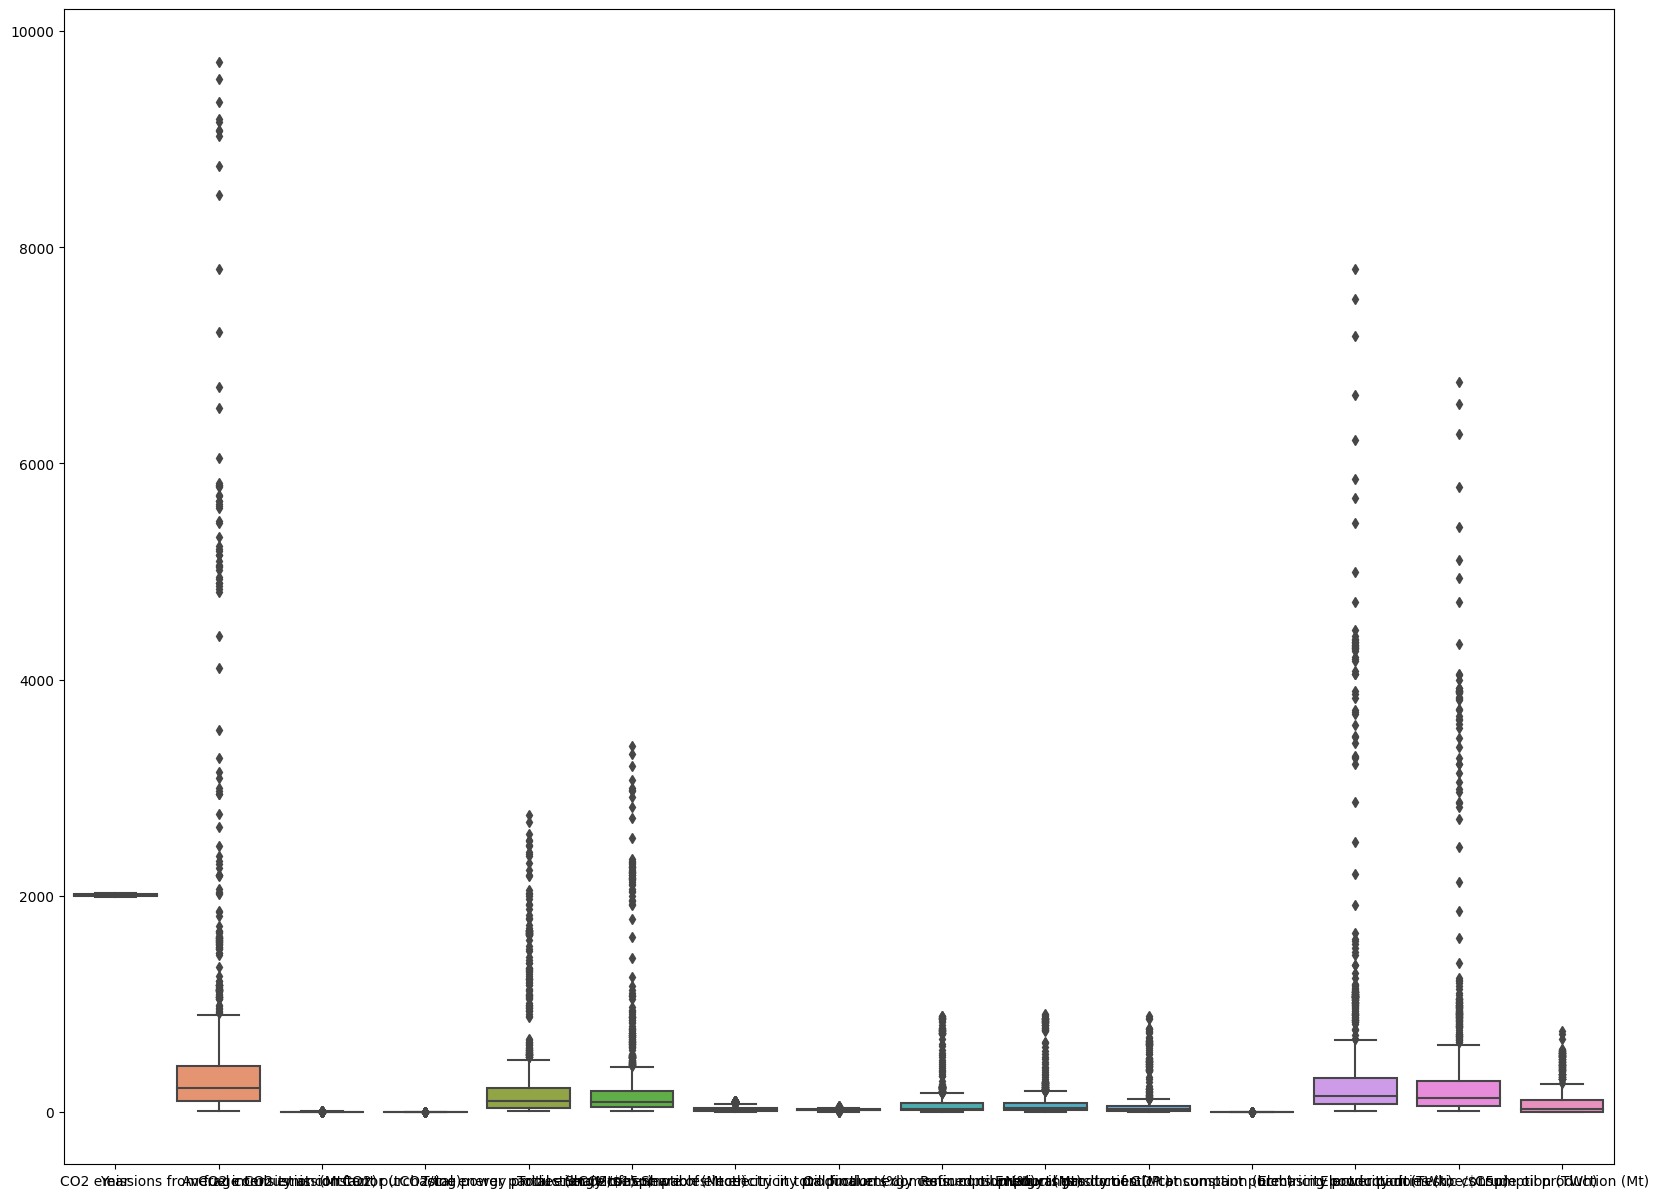

In [11]:
#visualisasi data dengan boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

# Klastering

In [12]:
#transformasi data variabel "CO2 emissions from fuel combustion (MtCO2)" dengan StandardScaler
columns = ['CO2 emissions from fuel combustion (MtCO2)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "CO2 emissions from fuel combustion (MtCO2)" yang telah transformasi data ke data aktual
df1["CO2 emissions from fuel combustion (MtCO2)"]=data_scale

#transformasi data variabel "Average CO2 emission factor (tCO2/toe)" dengan StandardScaler
columns = ['Average CO2 emission factor (tCO2/toe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Average CO2 emission factor (tCO2/toe)" yang telah transformasi data ke data aktual
df1["Average CO2 emission factor (tCO2/toe)"]=data_scale

#transformasi data variabel "CO2 intensity at constant purchasing power parities (kCO2/$15p)" dengan StandardScaler
columns = ['CO2 intensity at constant purchasing power parities (kCO2/$15p)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "CO2 intensity at constant purchasing power parities (kCO2/$15p)" yang telah transformasi data ke data aktual
df1["CO2 intensity at constant purchasing power parities (kCO2/$15p)"]=data_scale

#transformasi data variabel "Total energy production (Mtoe)" dengan StandardScaler
columns = ['Total energy production (Mtoe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Total energy production (Mtoe)" yang telah transformasi data ke data aktual
df1["Total energy production (Mtoe)"]=data_scale

#transformasi data variabel "Total energy consumption (Mtoe)" dengan StandardScaler
columns = ['Total energy consumption (Mtoe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Total energy consumption (Mtoe)" yang telah transformasi data ke data aktual
df1["Total energy consumption (Mtoe)"]=data_scale

#transformasi data variabel "Share of renewables in electricity production (%)" dengan StandardScaler
columns = ['Share of renewables in electricity production (%)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Share of renewables in electricity production (%)" yang telah transformasi data ke data aktual
df1["Share of renewables in electricity production (%)"]=data_scale

#transformasi data variabel "Share of electricity in total final energy consumption (%)" dengan StandardScaler
columns = ['Share of electricity in total final energy consumption (%)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Share of electricity in total final energy consumption (%)" yang telah transformasi data ke data aktual
df1["Share of electricity in total final energy consumption (%)"]=data_scale

#transformasi data variabel "Oil products domestic consumption (Mt)" dengan StandardScaler
columns = ['Oil products domestic consumption (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Oil products domestic consumption (Mt)" yang telah transformasi data ke data aktual
df1["Oil products domestic consumption (Mt)"]=data_scale

#transformasi data variabel "Refined oil products production (Mt)" dengan StandardScaler
columns = ['Refined oil products production (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Refined oil products production (Mt)" yang telah transformasi data ke data aktual
df1["Refined oil products production (Mt)"]=data_scale

#transformasi data variabel "Natural gas domestic consumption (bcm)" dengan StandardScaler
columns = ['Natural gas domestic consumption (bcm)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Natural gas domestic consumption (bcm)" yang telah transformasi data ke data aktual
df1["Natural gas domestic consumption (bcm)"]=data_scale

#transformasi data variabel "Energy intensity of GDP at constant purchasing power parities (koe/$15p)" dengan StandardScaler
columns = ['Energy intensity of GDP at constant purchasing power parities (koe/$15p)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Energy intensity of GDP at constant purchasing power parities (koe/$15p)" yang telah transformasi data ke data aktual
df1["Energy intensity of GDP at constant purchasing power parities (koe/$15p)"]=data_scale

#transformasi data variabel "Electricity production (TWh)" dengan StandardScaler
columns = ['Electricity production (TWh)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Electricity production (TWh)" yang telah transformasi data ke data aktual
df1["Electricity production (TWh)"]=data_scale

#transformasi data variabel "Electricity domestic consumption (TWh)" dengan StandardScaler
columns = ['Electricity domestic consumption (TWh)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Electricity domestic consumption (TWh)" yang telah transformasi data ke data aktual
df1["Electricity domestic consumption (TWh)"]=data_scale

#transformasi data variabel "Crude oil production (Mt)" dengan StandardScaler
columns = ['Crude oil production (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(df1[columns])
#Memasukan variabel "Crude oil production (Mt)" yang telah transformasi data ke data aktual
df1["Crude oil production (Mt)"]=data_scale

In [13]:
#feature selection data and split data
X = df1.drop(columns='country')
y = df1.country

In [14]:
#data traing 90% dan data testing 10% before random oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1227, 14), (137, 14), (1227,), (137,))

In [15]:
#Transformasi/normalisasi data dengan StandardScaler before resampling
columns = ['CO2 emissions from fuel combustion (MtCO2)', 'Average CO2 emission factor (tCO2/toe)', 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Share of renewables in electricity production (%)', 'Share of electricity in total final energy consumption (%)']
scaler = StandardScaler()
X_train_scale =scaler.fit_transform(X_train[columns])
X_test_scale =scaler.fit_transform(X_test[columns])



In [16]:
scaler

StandardScaler()

In [17]:
x_train[columns]=X_train_scale
x_test[columns]=X_test_scale


NameError: name 'x_train' is not defined

In [ ]:
#resampling
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [18]:
y_ros.value_counts()

NameError: name 'y_ros' is not defined

In [21]:
#data traing 90% dan data testing 10% after random oversampling
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.1, random_state=200)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1227, 14), (137, 14), (1227,), (137,))

In [ ]:
#Transformasi/normalisasi data dengan StandardScaler before resampling
columns = ['CO2 emissions from fuel combustion (MtCO2)', 'Average CO2 emission factor (tCO2/toe)', 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Share of renewables in electricity production (%)', 'Share of electricity in total final energy consumption (%)']
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train1[columns])
X_test_scale = scaler.fit_transform(X_test1[columns])


In [ ]:
X_train1[columns]=X_train_scale
X_test1[columns]=X_test_scale

In [17]:
columns = ['country']

df.drop(columns=columns, inplace=True)
df

,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Crude oil production (Mt)
0,-0.410183,0.266446,-0.447972,-0.323601,-0.457850,-0.914154,-1.267665,-0.473673,-0.382580,-0.387780,-0.579934,-0.444969,-0.438597,-0.136087
1,-0.406746,0.350622,-0.362727,-0.317430,-0.454970,-0.882844,-1.320017,-0.470789,-0.382283,-0.379165,-0.505109,-0.443420,-0.438099,-0.142558
2,-0.406653,0.258704,-0.378699,-0.313389,-0.453724,-0.904737,-1.252107,-0.471577,-0.382105,-0.375637,-0.498845,-0.442319,-0.436635,-0.143996
3,-0.405056,0.386861,-0.322812,-0.311586,-0.453531,-0.877805,-1.279396,-0.471257,-0.382075,-0.368224,-0.470213,-0.440882,-0.436616,-0.143235
4,-0.407407,0.332103,-0.364459,-0.322354,-0.455487,-0.914119,-1.158802,-0.477711,-0.393160,-0.372314,-0.502199,-0.440254,-0.436069,-0.148945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,-0.346468,-0.042469,-0.140588,-0.151435,-0.375573,1.346108,0.231126,-0.320937,-0.258765,-0.316278,-0.119099,-0.336238,-0.357064,0.483687
1360,-0.351529,-0.027754,0.020062,-0.201698,-0.382267,1.346176,0.279142,-0.339643,-0.298977,-0.315336,0.072095,-0.341275,-0.361523,0.326792
1361,-0.360482,0.826399,0.209030,-0.285681,-0.413519,1.346213,0.369724,-0.358220,-0.337878,-0.306602,-0.040637,-0.346115,-0.366469,0.089716
1362,-0.370419,0.990530,0.803382,-0.369049,-0.426311,1.346076,0.503146,-0.374330,-0.355620,-0.329018,0.486194,-0.350039,-0.369340,-0.144028


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1364.0,0.000000e+00,12.713020,-21.490224,-10.739412,0.027307,10.786499,21.522761
col2,1364.0,4.167406e-17,2.750822,-1.863711,-1.154214,-0.805537,-0.037260,17.784380


In [19]:
PCA_ds.info()
PCA_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1364 non-null   float64
 1   col2    1364 non-null   float64
dtypes: float64(2)
memory usage: 21.4 KB


,col1,col2
0,21.522761,-0.673411
1,21.519739,-0.655860
2,21.519745,-0.657813
3,21.517652,-0.643321
4,21.518559,-0.661488
...,...,...
1359,-21.456947,-1.291164
1360,-21.461227,-1.355841
1361,-21.464549,-1.413755
1362,-21.483629,-1.467268


Elbow Method to determine the number of clusters to be formed:


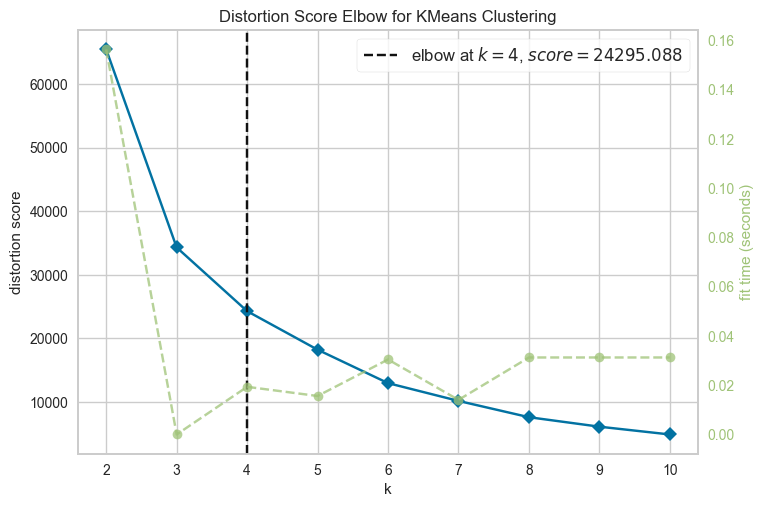

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [21]:
# inisialisasi model k-means dengan jumlah cluster yang telah di ditentukan
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(PCA_ds)

In [22]:
PCA_ds['Label']=label
PCA_ds

,col1,col2,Label
0,21.522761,-0.673411,3
1,21.519739,-0.655860,3
2,21.519745,-0.657813,3
3,21.517652,-0.643321,3
4,21.518559,-0.661488,3
...,...,...,...
1359,-21.456947,-1.291164,4
1360,-21.461227,-1.355841,4
1361,-21.464549,-1.413755,4
1362,-21.483629,-1.467268,4


In [23]:
PCA_ds['Label'].value_counts()

1    372
2    341
3    310
4    310
0     31
Name: Label, dtype: int64

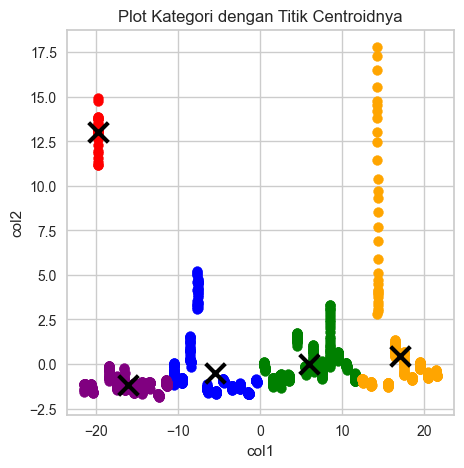

In [24]:
# Menghitung titik centroid untuk setiap kategori
centroids = PCA_ds.groupby('Label')[['col1', 'col2']].mean()

# Membuat plot untuk masing-masing kategori dan centroid
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for label, color in enumerate(colors[:len(centroids)]):
    indices = PCA_ds['Label'] == label
    ax.scatter(PCA_ds.loc[indices, 'col1'], PCA_ds.loc[indices, 'col2'], c=color, s=50)
    centroid = centroids.loc[label]
    ax.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, color='black')

# Menambahkan judul dan label sumbu
ax.set_title('Plot Kategori dengan Titik Centroidnya')
ax.set_xlabel('col1')
ax.set_ylabel('col2')

# Menampilkan plot
plt.show()

# Regresi

In [25]:
seed=123
np.random.seed(seed)

In [26]:
logreg = LogisticRegression(multi_class="auto")
logreg.fit(X_test, y_test)

LogisticRegression()

In [27]:
print("coefficents :",logreg.coef_ )
print("intercept :", logreg.intercept_)

coefficents : [[-1.47140947e-01  1.35315493e-01 -1.24293949e-01 -3.65099262e-02
  -1.75821644e-01 -5.49501040e-01 -8.12916471e-01 -2.26601567e-01
  -1.24018377e-01 -1.46111123e-01 -1.70682844e-01 -1.55114625e-01
  -1.54693805e-01  7.97988650e-02]
 [-2.13378749e-01 -4.23624109e-01 -3.17873301e-01 -1.18653564e-01
  -2.47382161e-01  2.38140853e-01 -2.39685252e-01 -3.98869641e-01
  -4.16919321e-01  5.38368983e-01 -3.59469003e-01 -2.42470817e-01
  -2.35923329e-01  8.42816607e-02]
 [ 6.96041987e-02  1.54043626e+00  3.94341221e-01  7.75479544e-01
  -1.65787616e-02 -9.76267743e-02  7.04084994e-01  1.72524488e-02
  -1.17108260e-01 -1.05110735e-01 -2.03553339e-02  3.28096133e-02
   4.57176349e-02 -3.18766421e-01]
 [-3.12652530e-01 -1.04796179e+00 -1.50015969e-01 -5.81839776e-01
  -3.99554543e-01 -1.07544635e+00 -1.85660426e-01 -4.42887249e-01
  -1.75380823e-01 -3.59543090e-01  7.31125573e-02 -3.87352261e-01
  -3.29847533e-01 -6.95032284e-01]
 [ 1.01389721e-01 -9.24647647e-01 -4.34041809e-01  1.8

In [28]:
logreg.predict_proba(X_test)[0:5]

array([[1.32277712e-03, 1.48730747e-02, 6.71159677e-07, 3.62359104e-02,
        6.86992763e-03, 4.45078806e-03, 5.16901168e-04, 3.44477736e-05,
        2.06108560e-03, 4.69601057e-04, 2.13733169e-05, 3.90051270e-02,
        2.36149606e-03, 1.52502583e-02, 2.03581450e-02, 4.11774831e-03,
        1.14162759e-05, 2.79186916e-06, 9.29638345e-06, 3.59142872e-05,
        5.62445936e-04, 2.60812314e-04, 4.65112829e-04, 2.50071783e-03,
        8.16219515e-01, 7.13530708e-06, 1.01605763e-05, 9.82028134e-06,
        8.58268922e-04, 1.65875831e-04, 1.30468539e-05, 1.31196357e-04,
        1.77910925e-04, 7.05028180e-03, 1.39435889e-05, 1.45133350e-02,
        3.66422525e-05, 2.67511936e-03, 4.19954847e-03, 9.21669944e-05,
        9.95515948e-06, 3.01479470e-04, 1.71675730e-03],
       [4.66819735e-10, 3.72053033e-11, 1.66459075e-05, 1.20705172e-13,
        1.22856579e-06, 3.95652206e-06, 1.67833236e-12, 9.42393350e-01,
        7.45514826e-12, 6.37451418e-12, 4.19890576e-11, 7.15739737e-07,
       

In [29]:
prediksi=logreg.predict(X_test)

In [30]:
print(accuracy_score(y_test,prediksi))

0.8467153284671532


In [31]:
print('accuracy_score: ',accuracy_score(y_test, prediksi))
print('f1_score: ',f1_score(y_test, prediksi, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test, prediksi, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test, prediksi, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test, prediksi))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test, prediksi))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test, prediksi)))
print("r2_score : %.2f "% r2_score(y_test, prediksi))

accuracy_score:  0.8467153284671532
f1_score:  0.8467153284671532
recall_score:  0.8467153284671532
precision_score:  0.8467153284671532
mean squared error (MSE) : 63.62 
mean absolute error (MAE) : 2.57 
roots mean squared error (RMSE) : 7.98 
r2_score : 0.62 


# ANN

In [32]:
seed=123
np.random.seed(seed)

In [33]:
data = pd.read_csv('Energy data 1990 - 2020.csv')

In [34]:
#menghitung jumlah output
data.country.value_counts().sort_values(ascending = False)

Algeria                 31
Argentina               31
Egypt                   31
Australia               31
Belgium                 31
Brazil                  31
Canada                  31
Chile                   31
China                   31
Colombia                31
Czechia                 31
France                  31
Malaysia                31
Germany                 31
India                   31
Indonesia               31
Iran                    31
Italy                   31
Japan                   31
Kazakhstan              31
Kuwait                  31
Mexico                  31
Netherlands             31
New Zealand             31
South Korea             31
Nigeria                 31
Norway                  31
Poland                  31
Portugal                31
Romania                 31
Russia                  31
Saudi Arabia            31
South Africa            31
Spain                   31
Uzbekistan              31
Sweden                  31
Taiwan                  31
T

In [35]:
#menghilangkan variabel yang tidak dibutuhkan
data=data.drop(columns=['Share of wind and solar in electricity production (%)'], inplace=False,axis=1)
data=data.drop(columns=['Coal and lignite production (Mt)'], inplace=False,axis=1)
data=data.drop(columns=['Region'], inplace=False,axis=1)
data=data.drop(columns=['Natural gas production (bcm)'], inplace=False,axis=1)
data=data.drop(columns=['Coal and lignite domestic consumption (Mt)'], inplace=False,axis=1)


In [36]:
data=data.drop(columns=['Year'], inplace=False,axis=1)

In [37]:
#melabelkan data output
data[['country']] = data[['country']].apply(LabelEncoder().fit_transform)

In [38]:
#transformasi data variabel "CO2 emissions from fuel combustion (MtCO2)" dengan StandardScaler
columns = ['CO2 emissions from fuel combustion (MtCO2)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "CO2 emissions from fuel combustion (MtCO2)" yang telah transformasi data ke data aktual
data["CO2 emissions from fuel combustion (MtCO2)"]=data_scale

#transformasi data variabel "Average CO2 emission factor (tCO2/toe)" dengan StandardScaler
columns = ['Average CO2 emission factor (tCO2/toe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Average CO2 emission factor (tCO2/toe)" yang telah transformasi data ke data aktual
data["Average CO2 emission factor (tCO2/toe)"]=data_scale

#transformasi data variabel "CO2 intensity at constant purchasing power parities (kCO2/$15p)" dengan StandardScaler
columns = ['CO2 intensity at constant purchasing power parities (kCO2/$15p)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "CO2 intensity at constant purchasing power parities (kCO2/$15p)" yang telah transformasi data ke data aktual
data["CO2 intensity at constant purchasing power parities (kCO2/$15p)"]=data_scale

#transformasi data variabel "Total energy production (Mtoe)" dengan StandardScaler
columns = ['Total energy production (Mtoe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Total energy production (Mtoe)" yang telah transformasi data ke data aktual
data["Total energy production (Mtoe)"]=data_scale

#transformasi data variabel "Total energy consumption (Mtoe)" dengan StandardScaler
columns = ['Total energy consumption (Mtoe)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Total energy consumption (Mtoe)" yang telah transformasi data ke data aktual
data["Total energy consumption (Mtoe)"]=data_scale

#transformasi data variabel "Share of renewables in electricity production (%)" dengan StandardScaler
columns = ['Share of renewables in electricity production (%)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Share of renewables in electricity production (%)" yang telah transformasi data ke data aktual
data["Share of renewables in electricity production (%)"]=data_scale

#transformasi data variabel "Share of electricity in total final energy consumption (%)" dengan StandardScaler
columns = ['Share of electricity in total final energy consumption (%)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Share of electricity in total final energy consumption (%)" yang telah transformasi data ke data aktual
data["Share of electricity in total final energy consumption (%)"]=data_scale

#transformasi data variabel "Oil products domestic consumption (Mt)" dengan StandardScaler
columns = ['Oil products domestic consumption (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Oil products domestic consumption (Mt)" yang telah transformasi data ke data aktual
data["Oil products domestic consumption (Mt)"]=data_scale

#transformasi data variabel "Refined oil products production (Mt)" dengan StandardScaler
columns = ['Refined oil products production (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Refined oil products production (Mt)" yang telah transformasi data ke data aktual
data["Refined oil products production (Mt)"]=data_scale

#transformasi data variabel "Natural gas domestic consumption (bcm)" dengan StandardScaler
columns = ['Natural gas domestic consumption (bcm)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Natural gas domestic consumption (bcm)" yang telah transformasi data ke data aktual
data["Natural gas domestic consumption (bcm)"]=data_scale

#transformasi data variabel "Energy intensity of GDP at constant purchasing power parities (koe/$15p)" dengan StandardScaler
columns = ['Energy intensity of GDP at constant purchasing power parities (koe/$15p)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Energy intensity of GDP at constant purchasing power parities (koe/$15p)" yang telah transformasi data ke data aktual
data["Energy intensity of GDP at constant purchasing power parities (koe/$15p)"]=data_scale

#transformasi data variabel "Electricity production (TWh)" dengan StandardScaler
columns = ['Electricity production (TWh)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Electricity production (TWh)" yang telah transformasi data ke data aktual
data["Electricity production (TWh)"]=data_scale

#transformasi data variabel "Electricity domestic consumption (TWh)" dengan StandardScaler
columns = ['Electricity domestic consumption (TWh)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Electricity domestic consumption (TWh)" yang telah transformasi data ke data aktual
data["Electricity domestic consumption (TWh)"]=data_scale

#transformasi data variabel "Crude oil production (Mt)" dengan StandardScaler
columns = ['Crude oil production (Mt)']
scaler = StandardScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "Crude oil production (Mt)" yang telah transformasi data ke data aktual
data["Crude oil production (Mt)"]=data_scale

In [39]:
#feature selection data and split data
X = data.drop(columns='country')
y = data.country

In [40]:
#melabelkan
y_train1 = np_utils.to_categorical(y_train, num_classes = 44)
y_test1 = np_utils.to_categorical(y_test, num_classes = 44)

In [41]:
#Mendefinisikan Model ANN
def get_model_ann(batch_size, learning_rate):
    model = Sequential()
    model.add(Dense(14,activation='relu', input_shape=(14,)))
    model.add(Dense(29,activation='relu')) #30? karena jumlah feature input ada 14 dan output ada 44 kategori. (14+44)/2=29=29(dibulatkan ke atas)
    model.add(Dense(29,activation='relu'))
    model.add(Dense(29,activation='relu'))
    model.add(Dense(44,activation='softmax')) 
    model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    history = model.fit(X_train, y_train1, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test1), callbacks=[early_stopping])
    return model

In [42]:
#Mendefinisikan Model 
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [16, 32],
             'learning_rate':[0.01, 0.001]}

In [43]:
ann = GridSearchCV(model_ann, param_grid=params_ann)

In [44]:
history = ann.fit(X_train, y_train1)

Epoch 1/100
77/77 [==============================] - 5s 20ms/step - loss: 2.7521 - accuracy: 0.2306 - val_loss: 1.4611 - val_accuracy: 0.4818
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 1.0215 - accuracy: 0.6699 - val_loss: 0.9130 - val_accuracy: 0.6715
Epoch 3/100
77/77 [==============================] - 0s 6ms/step - loss: 0.5125 - accuracy: 0.8223 - val_loss: 0.2551 - val_accuracy: 0.9051
Epoch 4/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8598 - val_loss: 0.3396 - val_accuracy: 0.8978
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8965 - val_loss: 0.2326 - val_accuracy: 0.9197
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3301 - accuracy: 0.8932 - val_loss: 0.4729 - val_accuracy: 0.8467
Epoch 7/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.9063 - val_loss: 0.3254 - val_accuracy: 0.8978
Epoch 8/100


77/77 [==============================] - 0s 5ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.0518 - val_accuracy: 0.9781
Epoch 32/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9984 - val_loss: 0.0207 - val_accuracy: 0.9927
Epoch 33/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9927
Epoch 34/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0196 - val_accuracy: 0.9927
Epoch 35/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9854
Epoch 36/100
77/77 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9650 - val_loss: 0.2168 - val_accuracy: 0.9343
Epoch 37/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2267 - accuracy: 0.9340 - val_loss: 0.1905 - val_accuracy: 0.9343
Epoch 38/100
77/77 

77/77 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.9201 - val_loss: 0.0635 - val_accuracy: 0.9635
Epoch 37/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0909 - accuracy: 0.9682 - val_loss: 0.0601 - val_accuracy: 0.9781
Epoch 38/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9804 - val_loss: 0.0847 - val_accuracy: 0.9635
Epoch 39/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0654 - accuracy: 0.9788 - val_loss: 0.0541 - val_accuracy: 0.9854
Epoch 40/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2734 - accuracy: 0.9348 - val_loss: 0.0659 - val_accuracy: 0.9635
Epoch 41/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.9340 - val_loss: 0.1510 - val_accuracy: 0.9489
Epoch 42/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.9315 - val_loss: 0.1917 - val_accuracy: 0.9197
Epoch 43/100
77/77 

77/77 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 52/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0954 - accuracy: 0.9780 - val_loss: 0.0504 - val_accuracy: 0.9854
Epoch 53/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9902 - val_loss: 0.0461 - val_accuracy: 0.9927
Epoch 54/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.9935 - val_loss: 0.0768 - val_accuracy: 0.9708
Epoch 55/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9894 - val_loss: 0.0412 - val_accuracy: 0.9927
Epoch 56/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9886 - val_loss: 0.0820 - val_accuracy: 0.9635
Epoch 57/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0361 - accuracy: 0.9935 - val_loss: 0.0744 - val_accuracy: 0.9635
Epoch 58/100
77/77 

Epoch 8/100
77/77 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.8566 - val_loss: 0.5585 - val_accuracy: 0.8540
Epoch 9/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4328 - accuracy: 0.8875 - val_loss: 0.4612 - val_accuracy: 0.8321
Epoch 10/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.9071 - val_loss: 0.3968 - val_accuracy: 0.8613
Epoch 11/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.9201 - val_loss: 0.3431 - val_accuracy: 0.9124
Epoch 12/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2734 - accuracy: 0.9275 - val_loss: 0.3601 - val_accuracy: 0.9051
Epoch 13/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2333 - accuracy: 0.9389 - val_loss: 0.2706 - val_accuracy: 0.9270
Epoch 14/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9397 - val_loss: 0.2252 - val_accuracy: 0.9416
Epoch 15

Epoch 66/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0311 - val_accuracy: 0.9781
Epoch 67/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9927
Epoch 68/100
16/16 [==============================] - 1s 5ms/step - loss: 0.0163 - accuracy: 0.9959
Epoch 1/100
39/39 [==============================] - 6s 37ms/step - loss: 3.1132 - accuracy: 0.1508 - val_loss: 2.1660 - val_accuracy: 0.3285
Epoch 2/100
39/39 [==============================] - 0s 7ms/step - loss: 1.4512 - accuracy: 0.5387 - val_loss: 0.9116 - val_accuracy: 0.6788
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 0.7311 - accuracy: 0.7514 - val_loss: 0.6893 - val_accuracy: 0.7591
Epoch 4/100
39/39 [==============================] - 0s 7ms/step - loss: 0.6996 - accuracy: 0.7547 - val_loss: 0.4655 - val_accuracy: 0.8394
Epoch 5/100
39/39 [==============================] 

39/39 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9854
Epoch 42/100
39/39 [==============================] - 0s 6ms/step - loss: 8.9285e-04 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9927
Epoch 43/100
39/39 [==============================] - 0s 6ms/step - loss: 7.1386e-04 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9927
Epoch 44/100
39/39 [==============================] - 0s 6ms/step - loss: 6.0464e-04 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 0.9927
Epoch 45/100
39/39 [==============================] - 0s 6ms/step - loss: 5.6079e-04 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9927
Epoch 46/100
39/39 [==============================] - 0s 6ms/step - loss: 4.9780e-04 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 47/100
39/39 [==============================] - 0s 6ms/step - loss: 4.4532e-04 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.

39/39 [==============================] - 0s 7ms/step - loss: 0.3216 - accuracy: 0.9315 - val_loss: 0.3141 - val_accuracy: 0.9197
Epoch 16/100
39/39 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.9218 - val_loss: 0.3105 - val_accuracy: 0.9343
Epoch 17/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2676 - accuracy: 0.9307 - val_loss: 0.2784 - val_accuracy: 0.9197
Epoch 18/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2390 - accuracy: 0.9495 - val_loss: 0.2600 - val_accuracy: 0.9197
Epoch 19/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2232 - accuracy: 0.9470 - val_loss: 0.2320 - val_accuracy: 0.9562
Epoch 20/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2048 - accuracy: 0.9519 - val_loss: 0.2208 - val_accuracy: 0.9343
Epoch 21/100
39/39 [==============================] - 0s 6ms/step - loss: 0.1876 - accuracy: 0.9576 - val_loss: 0.2035 - val_accuracy: 0.9489
Epoch 22/100
39/39 

39/39 [==============================] - 0s 7ms/step - loss: 1.6529 - accuracy: 0.5289 - val_loss: 1.5246 - val_accuracy: 0.4964
Epoch 8/100
39/39 [==============================] - 0s 6ms/step - loss: 1.3046 - accuracy: 0.6381 - val_loss: 1.2091 - val_accuracy: 0.6715
Epoch 9/100
39/39 [==============================] - 0s 6ms/step - loss: 1.0511 - accuracy: 0.7270 - val_loss: 1.0071 - val_accuracy: 0.6861
Epoch 10/100
39/39 [==============================] - 0s 6ms/step - loss: 0.8721 - accuracy: 0.7751 - val_loss: 0.8428 - val_accuracy: 0.7664
Epoch 11/100
39/39 [==============================] - 0s 6ms/step - loss: 0.7457 - accuracy: 0.7946 - val_loss: 0.7305 - val_accuracy: 0.7737
Epoch 12/100
39/39 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.8240 - val_loss: 0.6007 - val_accuracy: 0.8467
Epoch 13/100
39/39 [==============================] - 0s 6ms/step - loss: 0.5507 - accuracy: 0.8590 - val_loss: 0.5264 - val_accuracy: 0.8832
Epoch 14/100
39/39 [=

Epoch 61/100
39/39 [==============================] - 0s 6ms/step - loss: 0.0607 - accuracy: 0.9845 - val_loss: 0.0956 - val_accuracy: 0.9708
Epoch 62/100
39/39 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9837 - val_loss: 0.0784 - val_accuracy: 0.9781
Epoch 63/100
39/39 [==============================] - 0s 6ms/step - loss: 0.0600 - accuracy: 0.9853 - val_loss: 0.0703 - val_accuracy: 0.9854
Epoch 64/100
39/39 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 0.9870 - val_loss: 0.0722 - val_accuracy: 0.9854
Epoch 65/100
8/8 [==============================] - 1s 8ms/step - loss: 0.0783 - accuracy: 0.9837
Epoch 1/100
39/39 [==============================] - 4s 21ms/step - loss: 3.7219 - accuracy: 0.0497 - val_loss: 3.6337 - val_accuracy: 0.0876
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 3.5317 - accuracy: 0.1222 - val_loss: 3.3836 - val_accuracy: 0.1971
Epoch 3/100
39/39 [==============================] 

In [45]:
print("\n Parameter Terbaik  {}".format(history.best_params_))
print("\n Accuracy Terbaik  {}".format(history.best_score_))


 Parameter Terbaik  {'batch_size': 16, 'learning_rate': 0.001}

 Accuracy Terbaik  0.9902107238769531


In [46]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history.best_score_, history.best_params_))
means = history.cv_results_['mean_test_score']
stds = history.cv_results_['std_test_score']
params = history.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model = history.best_estimator_.model

Best: 0.990211 using {'batch_size': 16, 'learning_rate': 0.001}
0.942914 (0.077625) with: {'batch_size': 16, 'learning_rate': 0.01}
0.990211 (0.008003) with: {'batch_size': 16, 'learning_rate': 0.001}
0.980445 (0.006999) with: {'batch_size': 32, 'learning_rate': 0.01}
0.983713 (0.014986) with: {'batch_size': 32, 'learning_rate': 0.001}


In [56]:
model = Sequential()
model.add(Dense(14,activation='relu', input_shape=(14,)))
model.add(Dense(29,activation='relu'))#30? karena jumlah feature input ada 14 dan output ada 44 kategori. (14+44)/2=29=29(dibulatkan ke atas)
model.add(Dense(29,activation='relu'))
model.add(Dense(29,activation='relu'))
model.add(Dense(29,activation='softmax')) 
model.add(Dense(44,activation='softmax')) # gunakan softmax: output > 1,
                                         # gunakan sigmoid: output = 1 
model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 14)                210       
                                                                 
 dense_124 (Dense)           (None, 29)                435       
                                                                 
 dense_125 (Dense)           (None, 29)                870       
                                                                 
 dense_126 (Dense)           (None, 29)                870       
                                                                 
 dense_127 (Dense)           (None, 29)                870       
                                                                 
 dense_128 (Dense)           (None, 44)                1320      
                                                                 
Total params: 4,575
Trainable params: 4,575
Non-train

In [59]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)


history = model.fit(X_train, y_train1, epochs=100, batch_size=16, validation_data=(X_test, y_test1), callbacks=[early_stopping])

Epoch 1/100
77/77 [==============================] - 1s 7ms/step - loss: 0.4197 - accuracy: 0.8688 - val_loss: 0.4585 - val_accuracy: 0.8175
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4209 - accuracy: 0.8647 - val_loss: 0.5271 - val_accuracy: 0.7737
Epoch 3/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.8337 - val_loss: 0.5263 - val_accuracy: 0.7956
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4159 - accuracy: 0.8672 - val_loss: 0.4994 - val_accuracy: 0.7810
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8411 - val_loss: 0.5887 - val_accuracy: 0.7591
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8419 - val_loss: 0.4618 - val_accuracy: 0.8175
Epoch 7/100
77/77 [==============================] - 1s 6ms/step - loss: 0.4081 - accuracy: 0.8631 - val_loss: 0.5241 - val_accuracy: 0.8102
Epoch 8/100
7

In [60]:
evaluation = model.evaluate(X_test, y_test1)

5/5 [==============================] - 0s 6ms/step - loss: 0.3944 - accuracy: 0.8686


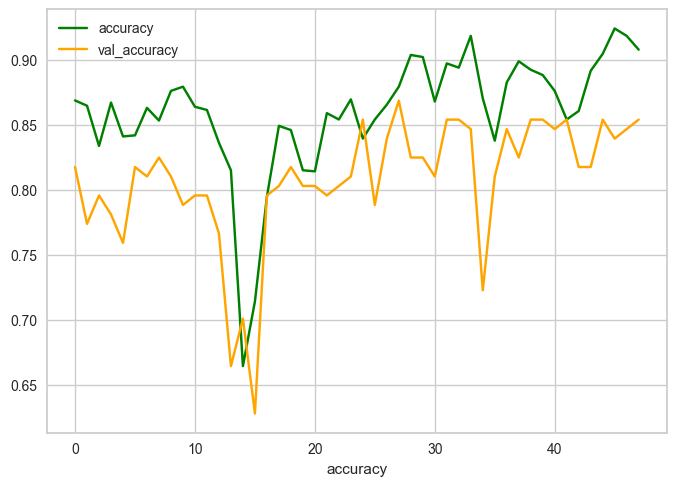

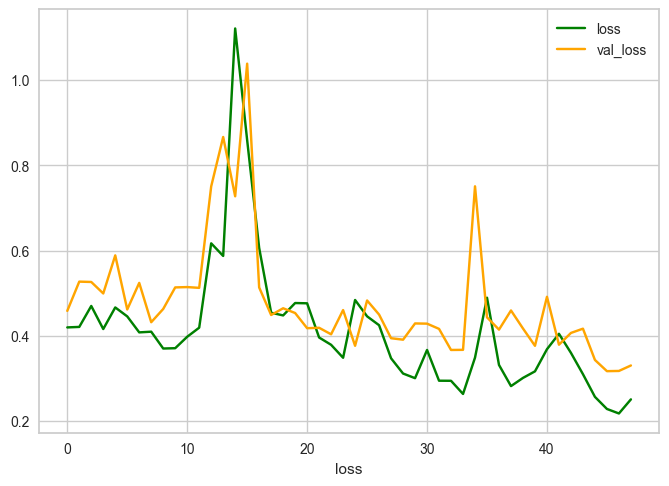

In [61]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'green')
    plt.plot(history.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [62]:
evaluation = model.evaluate(X_test, y_test1)

5/5 [==============================] - 0s 7ms/step - loss: 0.3944 - accuracy: 0.8686


In [63]:
ann_pred = np.argmax(model.predict(X_test),axis=1)
ann_pred

5/5 [==============================] - 0s 7ms/step


array([24, 29, 37, 20,  4,  1, 19, 34, 11, 34, 25, 42, 21, 12, 18, 29, 33,
       17, 13, 43, 11, 19,  3, 11, 39,  1, 20, 27, 28, 25,  3,  6, 10, 29,
       18,  6, 33, 22, 12, 43, 40, 11, 27, 38,  6, 39, 29, 43, 21, 18, 21,
       16, 39,  6, 29, 14, 31, 10, 29, 25, 32,  2, 42,  9, 29, 40, 27, 27,
       29, 35, 15,  8, 22,  3, 38, 23, 24, 15,  6,  6, 12,  1, 34, 14,  3,
       38, 37,  2, 24, 10, 11, 25, 34, 26, 33, 38, 17, 13, 18,  4,  1, 16,
        8,  1, 36, 36,  0, 35, 23, 16, 27, 33, 16, 29,  9, 11,  4, 27,  6,
       14, 33, 16, 37, 17, 29, 29, 15, 42,  5, 29,  2, 43, 23, 35, 28,  1,
       10], dtype=int64)

In [64]:
y_test = np.argmax(y_test1,axis=1)
y_test

array([24,  7, 37, 20,  4,  1, 19, 34, 11, 34, 25, 42, 21, 12, 18, 41, 33,
       17, 13, 43, 11, 19,  3, 11, 39,  8, 20, 27, 28, 25,  3,  6, 10, 41,
       18, 27, 33, 36, 12, 43, 40, 11, 27, 38, 27, 39, 13, 43, 21, 18, 21,
       16, 39,  6,  7, 14, 31, 10, 41, 25, 32,  2, 42,  9,  7, 40, 27,  6,
       41, 35, 15,  8, 22,  3, 38, 23, 24, 15,  6,  6, 12,  1, 34, 14,  3,
       42, 37,  2, 24, 10, 11, 25, 34, 26, 33, 38, 17, 13, 18,  4,  1, 16,
        8,  1, 36, 36,  0, 35, 23, 16, 27, 33, 16,  7,  9, 11,  4, 27, 27,
       14, 33, 16, 37, 17, 13, 29, 15, 42,  5, 29,  2, 43, 23, 35,  9,  1,
       10], dtype=int64)

In [65]:
print ('accuracy_score: ',accuracy_score(y_test,ann_pred))
print ('f1_score: ',f1_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,ann_pred, pos_label='positive', average='micro'))

accuracy_score:  0.8686131386861314
f1_score:  0.8686131386861314
recall_score:  0.8686131386861314
precision_score:  0.8686131386861314


In [66]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.57      0.80      0.67         5
           7       0.00      0.00      0.00         4
           8       1.00      0.67      0.80         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         3
          13       1.00      0.50      0.67         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         5
          17       1.00    

In [67]:
import pickle

In [72]:
fillname2="ANN_model.pkl"
pickle.dump(model, open(fillname2,"wb"))

In [68]:
fillname3="MLR_model.pkl"
pickle.dump(logreg, open(fillname3,"wb"))

In [70]:
fillname4="klaster_model.pkl"
pickle.dump(kmeans, open(fillname4,"wb"))

In [16]:
fillname5="scaler5.pkl"
pickle.dump(scaler, open(fillname5,"wb"))

In [73]:
fillname12="ANN_model.sav"
pickle.dump(model, open(fillname12,"wb"))

In [69]:
fillname13="MLR_model.sav"
pickle.dump(logreg, open(fillname13,"wb"))

In [71]:
fillname14="klaster_model.sav"
pickle.dump(kmeans, open(fillname14,"wb"))

In [76]:
fillname15="scaler.sav"
pickle.dump(scaler, open(fillname15,"wb"))